# what is factor analysis?

Factor Analysis (FA) is a statistical technique used to identify latent variables or factors that explain the observed correlations among multiple variables. 

- Mostly used during eda
- also can be used as dimentionality reduction approach

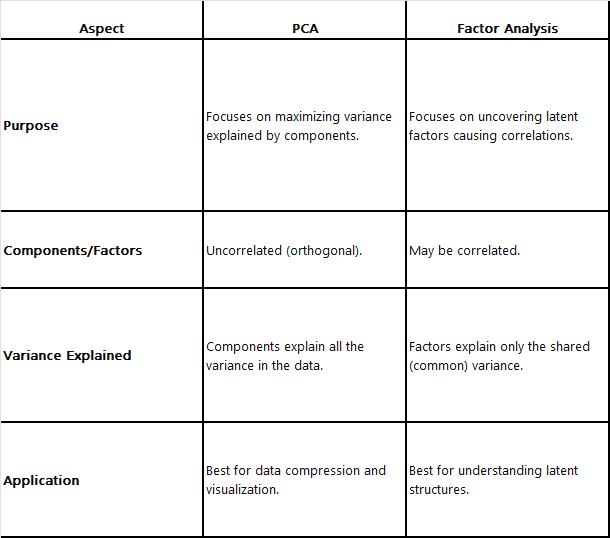

  ## Step-by-Step: How Factor Analysis Works
  
  1. **Start with your dataset:** Collect all observed variables (features) that might be influenced by shared underlying factors.
  
  2. **Prepare the data:** 
     - Inspect your data for missing values and handle them appropriately.
     - Standardize (normalize) the variables, typically so that each has mean 0 and variance 1. This ensures each variable is on the same scale and equally weighted.
  
  3. **Determine how many factors to extract:**
     - Use methods such as the scree plot, Kaiser criterion, or domain knowledge to decide on a suitable number of latent factors.
  
  4. **Run factor analysis:**
     - Apply factor analysis to estimate the latent factors that explain the covariance structure within your dataset.
  
  5. **Examine factor loadings:**
     - Inspect the resulting factor loadings (coefficients that show the relationship between each variable and each factor).
     - Interpret the loadings to understand which variables are strongly associated with each factor (e.g., loadings close to 1 or -1 show strong association).
  
  6. **Rotate factors (if needed):**
     - Use techniques like varimax rotation to make the factor structure more interpretable (i.e., to achieve simple structure where each variable loads highly onto one factor).
  
  7. **Obtain factor scores:**
     - Calculate factor scores for each observation—these scores represent the value of each latent factor for each data point.
  
  8. **Interpret and use the results:**
     - Analyze the factors and scores: e.g., for feature reduction, data visualization, clustering, or understanding the underlying structure of your data.
  
  Factor Analysis provides a detailed look at the relationships between variables, allowing you to detect hidden patterns and reduce dimensionality in a systematic way.


In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
age = np.random.randint(25, 60, size=n_samples)  # Age between 25 and 60
salary = np.random.normal(loc=70000, scale=10000, size=n_samples)  # Salary with mean 70k
savings = salary * 0.3 + np.random.normal(scale=5000, size=n_samples)  # Savings depend on salary
expenses = age * 100 + np.random.normal(scale=1000, size=n_samples)  # Expenses increase with age

# Create a DataFrame
data = pd.DataFrame({
    "Salary": salary,
    "Age": age,
    "Savings": savings,
    "Expenses": expenses
})

# Standardize the data (important for FA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform Factor Analysis
n_factors = 2  # Number of latent factors to extract
fa = FactorAnalysis(n_components=n_factors, random_state=42)
factors = fa.fit_transform(data_scaled)

# Create DataFrame for Factor Loadings
factor_loadings = pd.DataFrame(fa.components_.T, 
                               index=data.columns, 
                               columns=[f'Factor{i+1}' for i in range(n_factors)])

# Output
print("Dataset (first 5 rows):")
print(data.head())

print("\nFactor Loadings:")
print(factor_loadings)

# Factors for each individual
print("\nFactor Scores for Individuals (first 5 rows):")
factor_scores = pd.DataFrame(factors, columns=[f'Factor{i+1}' for i in range(n_factors)])
print(factor_scores.head())


Dataset (first 5 rows):
          Salary  Age       Savings     Expenses
0   84954.342529   53  29336.189558  6843.067652
1   73381.812520   39  28356.491368  5223.263807
2  103722.962536   32  33239.319981  3071.587853
3   60796.091949   45  22941.505510  4034.335229
4   66013.616100   43  15465.879380  4358.508902

Factor Loadings:
           Factor1   Factor2
Salary    0.340808  0.605329
Age       0.874719 -0.067362
Savings   0.168234  0.650271
Expenses  0.880060 -0.085369

Factor Scores for Individuals (first 5 rows):
    Factor1   Factor2
0  1.492074  0.915604
1  0.223162  0.608149
2 -0.513728  2.750294
3 -0.033493 -0.386333
4 -0.025464 -0.773869


 - Factor1: Represents "Wealth" (correlated with Salary and Savings).

 - Factor2: Represents "Lifestyle" (correlated with Age and Expenses).


 Thus Factor analysis helps to understand correlation as well as apply latent feature extraction

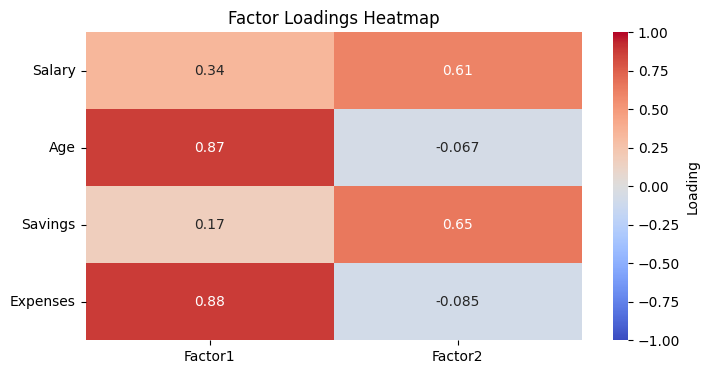

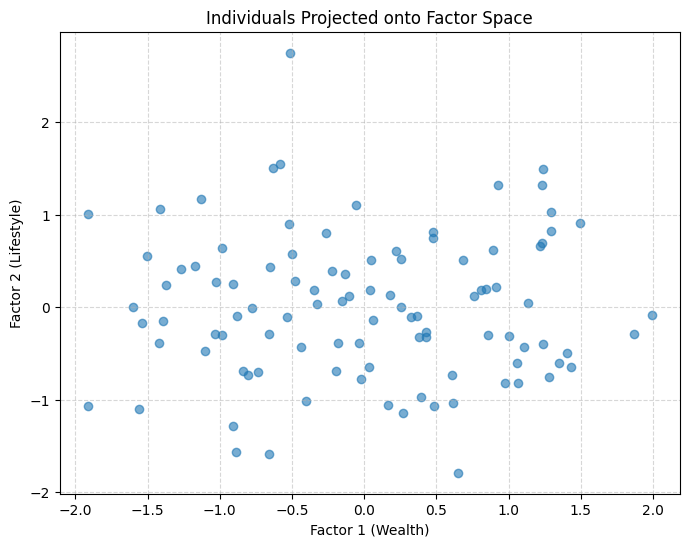

In [3]:
# Visualize Factor Loadings using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={"label": "Loading"})
plt.title("Factor Loadings Heatmap")
plt.yticks(rotation=0)
plt.show()

# Visualize individuals in factor space
plt.figure(figsize=(8, 6))
plt.scatter(factor_scores["Factor1"], factor_scores["Factor2"], alpha=0.6)
plt.xlabel("Factor 1 (Wealth)")
plt.ylabel("Factor 2 (Lifestyle)")
plt.title("Individuals Projected onto Factor Space")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### How to Understand These Results

 - The factor loadings table and heatmap show how each observed variable relates to (or "loads on") each extracted factor. Larger absolute values imply a stronger relationship.
 - For example, if "Salary" and "Savings" have high values on Factor 1, this suggests Factor 1 represents "Wealth."
 - If "Age" and "Expenses" have high values on Factor 2, this suggests Factor 2 can be interpreted as "Lifestyle".
 - The factor scores assign each individual a value for each factor, summarizing their data along these underlying dimensions.
 - The scatter plot of individuals in factor space helps visualize patterns or groupings based on these latent features, which may indicate clusters or trends not obvious in the raw variables.
 
 In summary: Factor analysis simplifies complex data into a few interpretable factors, which can help with understanding variable relationships, dimensionality reduction, and further analyses or visualizations.


 ### Pros and Cons of Factor Analysis

 **Pros:**
 - Reduces data dimensionality, making complex datasets easier to interpret.
 - Reveals hidden (latent) variables that explain observed correlations.
 - Can help identify underlying structure and patterns in the data.
 - Useful for feature extraction and preparation for further analysis (e.g., clustering, regression).
 - Aids in removing multicollinearity by summarizing correlated variables into a smaller set of factors.

 **Cons:**
 - Results can be sensitive to the choice of the number of factors.
 - Factors may be difficult to interpret, especially if loadings are not clear cut.
 - Assumes linear relationships and normality, which may not hold for all datasets.
 - May not perform well with small sample sizes or highly skewed data.
 - Can oversimplify the true relationships in highly complex data.
